In [2]:
import pandas as pd
import requests as r
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import json
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
api_key = "aBIdeyJp18dnYHxOLyICUOdCfrz7C2g1VFRdCQbx"


In [47]:
solar_monthly_url = f"https://api.eia.gov/v2/electricity/electric-power-operational-data/data/?frequency=monthly&data[0]=generation&facets[fueltypeid][]=SPV&facets[location][]=MO&facets[sectorid][]=99&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key={api_key}"
wind_monthly_url = f"https://api.eia.gov/v2/electricity/electric-power-operational-data/data/?frequency=monthly&data[0]=generation&facets[fueltypeid][]=WND&facets[location][]=MO&facets[sectorid][]=99&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key={api_key}"

In [48]:
try:
    (request := r.get(solar_monthly_url))
    print("Success")
except Exception as e:
    print(e)

Success


In [50]:
json_data = request.json()

In [51]:
solar_generation = pd.DataFrame(json_data.get('response').get('data'))

In [52]:
solar_generation.head()

,period,location,stateDescription,sectorid,sectorDescription,fueltypeid,fuelTypeDescription,generation,generation-units
0,2023-01,MO,Missouri,99,All Sectors,SPV,solar photovoltaic,9.56056,thousand megawatthours
1,2022-12,MO,Missouri,99,All Sectors,SPV,solar photovoltaic,7.20169,thousand megawatthours
2,2022-11,MO,Missouri,99,All Sectors,SPV,solar photovoltaic,9.47591,thousand megawatthours
3,2022-10,MO,Missouri,99,All Sectors,SPV,solar photovoltaic,14.40455,thousand megawatthours
4,2022-09,MO,Missouri,99,All Sectors,SPV,solar photovoltaic,15.42541,thousand megawatthours


In [53]:
solar_generation.period = pd.to_datetime(solar_generation.period)

<AxesSubplot:xlabel='period', ylabel='generation'>

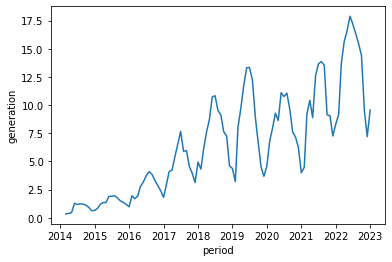

In [54]:
sns.lineplot(x="period",y="generation",data=solar_generation)

In [55]:
index=pd.DatetimeIndex(solar_generation.period).to_period("M")
y = pd.Series(solar_generation.generation.values, index=index)
arima = ARIMA(y,order=(2,0,2)).fit()

c:\users\josh\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
c:\users\josh\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
c:\users\josh\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


In [56]:
print(arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  107
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -191.038
Date:                Sun, 02 Apr 2023   AIC                            394.076
Time:                        18:06:01   BIC                            410.113
Sample:                             0   HQIC                           400.577
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4249      2.181      2.945      0.003       2.150      10.700
ar.L1          1.3939      0.278      5.023      0.000       0.850       1.938
ar.L2         -0.4780      0.261     -1.829      0.0

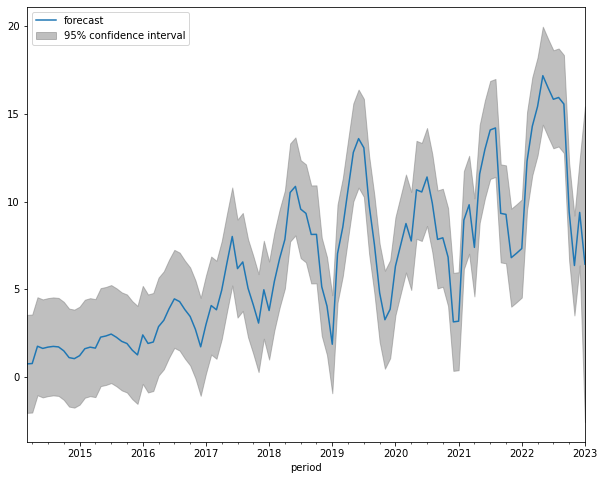

In [57]:
fig, ax = plt.subplots(figsize=(10, 8))
fig = plot_predict(arima, ax=ax)
legend = ax.legend(loc="upper left")

In [15]:
sarimax = SARIMAX(y,order=(2,0,2),seasonal_order=(2,0,2,12)).fit()

c:\users\josh\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
c:\users\josh\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


In [16]:
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  107
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 12)   Log Likelihood                -178.096
Date:                            Sun, 02 Apr 2023   AIC                            374.192
Time:                                    17:48:02   BIC                            398.247
Sample:                                         0   HQIC                           383.944
                                            - 107                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2224      0.472      0.471      0.638      -0.704       1.148
ar.L2          0.6790      0.434      1.564      0.118      -0.172       1.530
ma.L1          0.7592      0.480      1.581      0.114      -0.182       1.700
ma.L2          0.0988      0.112      0.883      0.377      -0.120       0.318
ar.S.L12      -0.0375      4.523     -0.008      0.993      -8.902       8.827
ar.S.L24       0.8338      3.946      0.211      0.833      -6.900       8.568
ma.S.L12       0.4142      4.698      0.088      0.930      -8.795       9.623
ma.S.L24      -0.5069      2.267     -0.224      0.823      -4.950       3.936
sigma2         1.4757      0.273      5.413      0.000       0.941       2.010
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                12.46
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

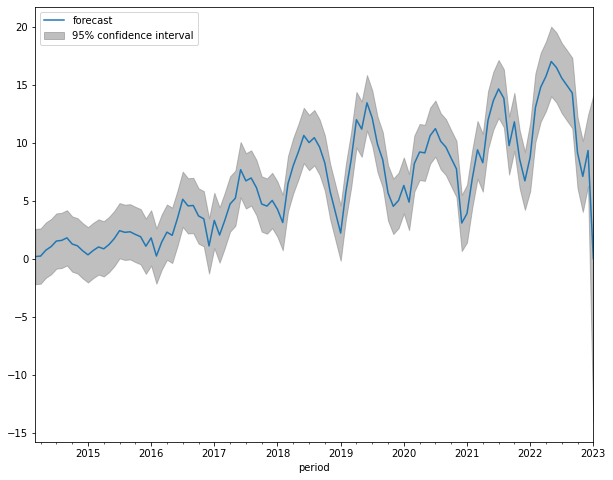

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
fig = plot_predict(sarimax, ax=ax)
legend = ax.legend(loc="upper left")

In [58]:
try:
    (request := r.get(wind_monthly_url))
    print("Success")
except Exception as e:
    print(e)

Success


In [59]:
json_data = request.json()

In [60]:
wind_generation = pd.DataFrame(json_data.get('response').get('data'))

In [61]:
wind_generation.head()

,period,location,stateDescription,sectorid,sectorDescription,fueltypeid,fuelTypeDescription,generation,generation-units
0,2023-01,MO,Missouri,99,All Sectors,WND,wind,664.16199,thousand megawatthours
1,2022-12,MO,Missouri,99,All Sectors,WND,wind,765.94774,thousand megawatthours
2,2022-11,MO,Missouri,99,All Sectors,WND,wind,794.67596,thousand megawatthours
3,2022-10,MO,Missouri,99,All Sectors,WND,wind,568.17608,thousand megawatthours
4,2022-09,MO,Missouri,99,All Sectors,WND,wind,468.58903,thousand megawatthours


In [62]:
wind_generation.period = pd.to_datetime(wind_generation.period)

<AxesSubplot:xlabel='period', ylabel='generation'>

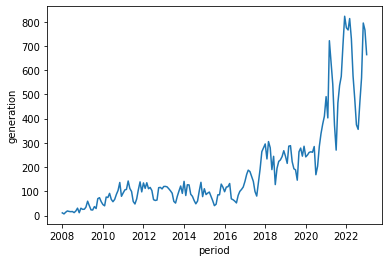

In [63]:
sns.lineplot(x="period",y="generation",data=wind_generation)

Hourly Prediction

In [66]:
solar_hourly_url = f"https://api.eia.gov/v2/electricity/rto/fuel-type-data/data/?frequency=hourly&data[0]=value&facets[fueltype][]=SUN&facets[respondent][]=MISO&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key={api_key}"
wind_hourly_url = f"https://api.eia.gov/v2/electricity/rto/fuel-type-data/data/?frequency=hourly&data[0]=value&facets[respondent][]=MISO&facets[fueltype][]=WND&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key={api_key}"

In [65]:
try:
    (request := r.get(solar_hourly_url))
    print("Success")
except Exception as e:
    print(e)

Success


In [67]:
json_data = request.json()

In [21]:
hourly_solar_generation = pd.DataFrame(json_data.get('response').get('data'))

In [22]:
hourly_solar_generation.head()

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2023-04-02T05,MISO,"Midcontinent Independent System Operator, Inc.",SUN,Solar,0,megawatthours
1,2023-04-02T04,MISO,"Midcontinent Independent System Operator, Inc.",SUN,Solar,0,megawatthours
2,2023-04-02T03,MISO,"Midcontinent Independent System Operator, Inc.",SUN,Solar,0,megawatthours
3,2023-04-02T02,MISO,"Midcontinent Independent System Operator, Inc.",SUN,Solar,0,megawatthours
4,2023-04-02T01,MISO,"Midcontinent Independent System Operator, Inc.",SUN,Solar,34,megawatthours


In [23]:
hourly_solar_generation.period = pd.to_datetime(hourly_solar_generation.period)


In [24]:
hourly_solar_generation.head()

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2023-04-02 05:00:00,MISO,"Midcontinent Independent System Operator, Inc.",SUN,Solar,0,megawatthours
1,2023-04-02 04:00:00,MISO,"Midcontinent Independent System Operator, Inc.",SUN,Solar,0,megawatthours
2,2023-04-02 03:00:00,MISO,"Midcontinent Independent System Operator, Inc.",SUN,Solar,0,megawatthours
3,2023-04-02 02:00:00,MISO,"Midcontinent Independent System Operator, Inc.",SUN,Solar,0,megawatthours
4,2023-04-02 01:00:00,MISO,"Midcontinent Independent System Operator, Inc.",SUN,Solar,34,megawatthours


<AxesSubplot:xlabel='period', ylabel='value'>

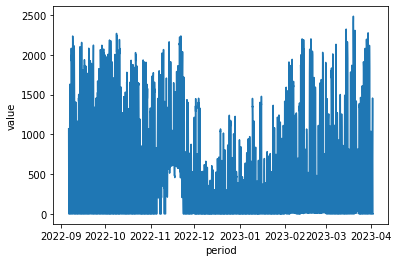

In [25]:
sns.lineplot(x="period",y="value",data=hourly_solar_generation)

In [68]:
try:
    (request := r.get(wind_hourly_url))
    print("Success")
except Exception as e:
    print(e)

Success


In [69]:
json_data = request.json()

In [70]:
hourly_wind_generation = pd.DataFrame(json_data.get('response').get('data'))

In [71]:
hourly_wind_generation.head()

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2023-04-02T05,MISO,"Midcontinent Independent System Operator, Inc.",WND,Wind,12282,megawatthours
1,2023-04-02T04,MISO,"Midcontinent Independent System Operator, Inc.",WND,Wind,9427,megawatthours
2,2023-04-02T03,MISO,"Midcontinent Independent System Operator, Inc.",WND,Wind,7617,megawatthours
3,2023-04-02T02,MISO,"Midcontinent Independent System Operator, Inc.",WND,Wind,6584,megawatthours
4,2023-04-02T01,MISO,"Midcontinent Independent System Operator, Inc.",WND,Wind,6137,megawatthours


In [72]:
hourly_wind_generation.period = pd.to_datetime(hourly_wind_generation.period)

<AxesSubplot:xlabel='period', ylabel='value'>

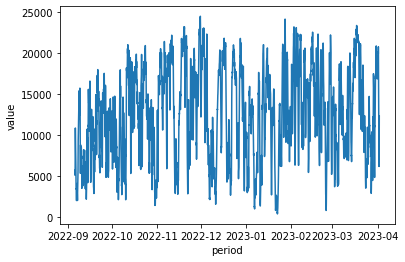

In [73]:
sns.lineplot(x="period",y="value",data=hourly_wind_generation)

Weather Data

In [26]:
weather_hourly_url = "https://api.weather.gov/stations/KSTL/observations?limit=500"

In [39]:
try:
    (request := r.get(weather_hourly_url))
    print("Successful")
except Exception as e:
    print(e)

Successful


In [28]:
json_data = request.json()

In [29]:
d= json.loads(request.text)

In [30]:
parsed = [d["features"][i]["properties"] for i in range(0,len(d["features"]))]

for i in range(0,len(parsed)):
    for key in parsed[i].keys():
        if isinstance(parsed[i][key],dict):
            if "value" in parsed[i][key]:
                parsed[i][key] = parsed[i][key]["value"]

In [31]:
hourly_observation_data = pd.DataFrame(parsed)

In [32]:
forecast_url = "https://api.weather.gov/gridpoints/LSX/89,80/forecast/hourly"

In [38]:
try:
    (request := r.get(forecast_url))
    print("Successful")
except Exception as e:
    print(e)

Successful


In [34]:
d = json.loads(request.text)

In [35]:
hourly_forecast_data = pd.DataFrame(d["properties"]["periods"])

In [40]:
hourly_forecast_data.head()

,number,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,probabilityOfPrecipitation,dewpoint,relativeHumidity,windSpeed,windDirection,icon,shortForecast,detailedForecast
0,1,,2023-04-02T17:00:00-05:00,2023-04-02T18:00:00-05:00,True,69,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': 2.777777...","{'unitCode': 'wmoUnit:percent', 'value': 31}",17 mph,S,"https://api.weather.gov/icons/land/day/skc,0?s...",Sunny,
1,2,,2023-04-02T18:00:00-05:00,2023-04-02T19:00:00-05:00,False,68,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': 3.333333...","{'unitCode': 'wmoUnit:percent', 'value': 33}",15 mph,S,"https://api.weather.gov/icons/land/night/few,0...",Mostly Clear,
2,3,,2023-04-02T19:00:00-05:00,2023-04-02T20:00:00-05:00,False,66,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': 3.333333...","{'unitCode': 'wmoUnit:percent', 'value': 36}",13 mph,S,"https://api.weather.gov/icons/land/night/few,0...",Mostly Clear,
3,4,,2023-04-02T20:00:00-05:00,2023-04-02T21:00:00-05:00,False,64,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': 4.444444...","{'unitCode': 'wmoUnit:percent', 'value': 41}",13 mph,S,"https://api.weather.gov/icons/land/night/few,0...",Mostly Clear,
4,5,,2023-04-02T21:00:00-05:00,2023-04-02T22:00:00-05:00,False,62,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': 5}","{'unitCode': 'wmoUnit:percent', 'value': 46}",13 mph,S,"https://api.weather.gov/icons/land/night/few,0...",Mostly Clear,


In [41]:
hourly_observation_data.head()

,@id,@type,elevation,station,timestamp,rawMessage,textDescription,icon,presentWeather,temperature,...,visibility,maxTemperatureLast24Hours,minTemperatureLast24Hours,precipitationLastHour,precipitationLast3Hours,precipitationLast6Hours,relativeHumidity,windChill,heatIndex,cloudLayers
0,https://api.weather.gov/stations/KSTL/observat...,wx:ObservationStation,172,https://api.weather.gov/stations/KSTL,2023-04-02T21:51:00+00:00,KSTL 022151Z 16016G23KT 10SM FEW250 22/02 A297...,Mostly Clear,https://api.weather.gov/icons/land/day/few?siz...,[],22.2,...,16090,None,None,NaN,NaN,NaN,25.852895,NaN,21.150603,"[{'base': {'unitCode': 'wmoUnit:m', 'value': 7..."
1,https://api.weather.gov/stations/KSTL/observat...,wx:ObservationStation,172,https://api.weather.gov/stations/KSTL,2023-04-02T20:51:00+00:00,KSTL 022051Z 17013G25KT 10SM FEW250 22/02 A297...,Mostly Clear,https://api.weather.gov/icons/land/day/few?siz...,[],21.7,...,16090,None,None,NaN,NaN,NaN,27.621887,NaN,20.646794,"[{'base': {'unitCode': 'wmoUnit:m', 'value': 7..."
2,https://api.weather.gov/stations/KSTL/observat...,wx:ObservationStation,172,https://api.weather.gov/stations/KSTL,2023-04-02T19:51:00+00:00,,,None,[],20.6,...,16090,None,None,NaN,NaN,NaN,29.551029,NaN,NaN,[]
3,https://api.weather.gov/stations/KSTL/observat...,wx:ObservationStation,172,https://api.weather.gov/stations/KSTL,2023-04-02T18:51:00+00:00,KSTL 021851Z 16014G23KT 10SM FEW250 19/03 A299...,Mostly Clear,https://api.weather.gov/icons/land/day/few?siz...,[],19.4,...,16090,None,None,NaN,NaN,NaN,33.216319,NaN,NaN,"[{'base': {'unitCode': 'wmoUnit:m', 'value': 7..."
4,https://api.weather.gov/stations/KSTL/observat...,wx:ObservationStation,172,https://api.weather.gov/stations/KSTL,2023-04-02T17:51:00+00:00,KSTL 021751Z 16015G21KT 10SM FEW250 17/02 A299...,Mostly Clear,https://api.weather.gov/icons/land/day/few?siz...,[],17.2,...,16090,None,None,NaN,NaN,NaN,36.539518,NaN,NaN,"[{'base': {'unitCode': 'wmoUnit:m', 'value': 7..."


In [42]:
hourly_observation_data.columns

Index(['@id', '@type', 'elevation', 'station', 'timestamp', 'rawMessage',
       'textDescription', 'icon', 'presentWeather', 'temperature', 'dewpoint',
       'windDirection', 'windSpeed', 'windGust', 'barometricPressure',
       'seaLevelPressure', 'visibility', 'maxTemperatureLast24Hours',
       'minTemperatureLast24Hours', 'precipitationLastHour',
       'precipitationLast3Hours', 'precipitationLast6Hours',
       'relativeHumidity', 'windChill', 'heatIndex', 'cloudLayers'],
      dtype='object')

In [44]:
observation_columns_to_keep = ["timestamp","textDescription","temperature","windSpeed",'windDirection','temperature']
hourly_observation_data = hourly_observation_data.loc[:,observation_columns_to_keep]

In [46]:
##Temp will need to be converted to Celsius
forecast_columns_to_keep = ["startTime","isDaytime","temperature","windSpeed","windDirection","shortForecast"]
hourly_forecast_data = hourly_forecast_data.loc[:,forecast_columns_to_keep]